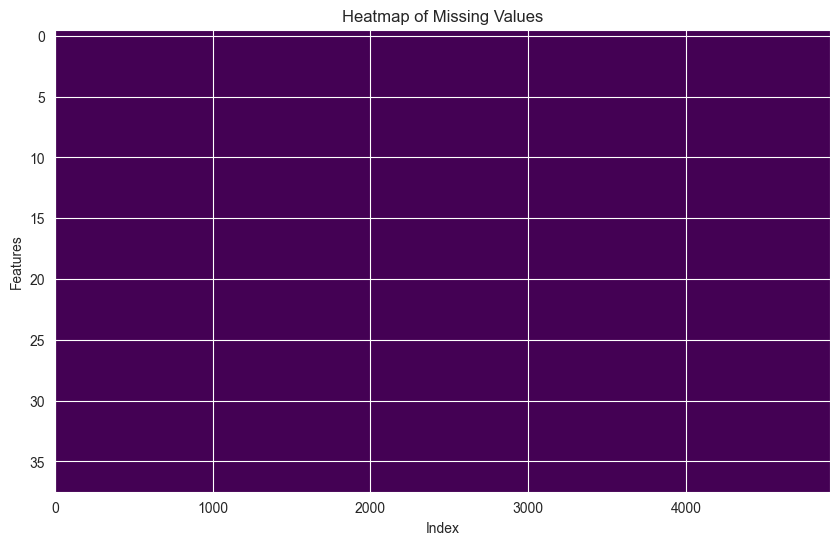

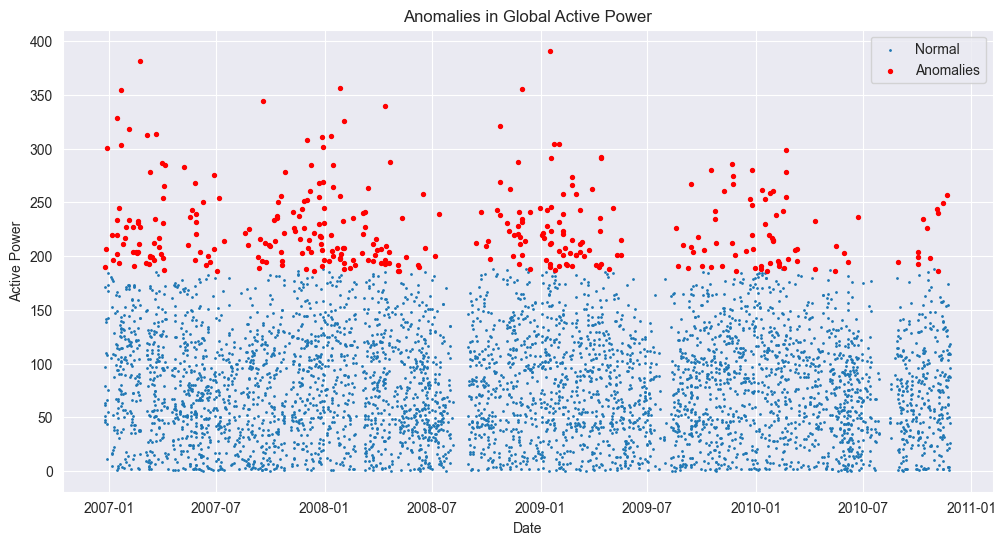

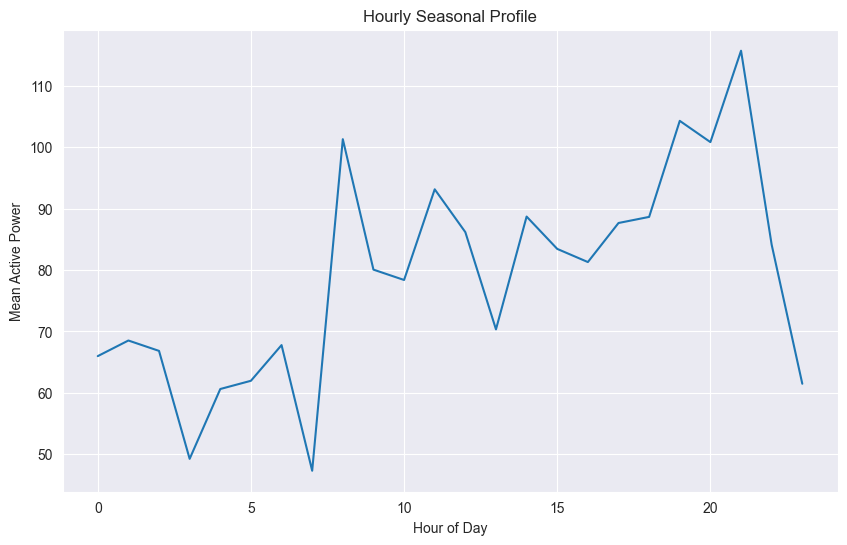

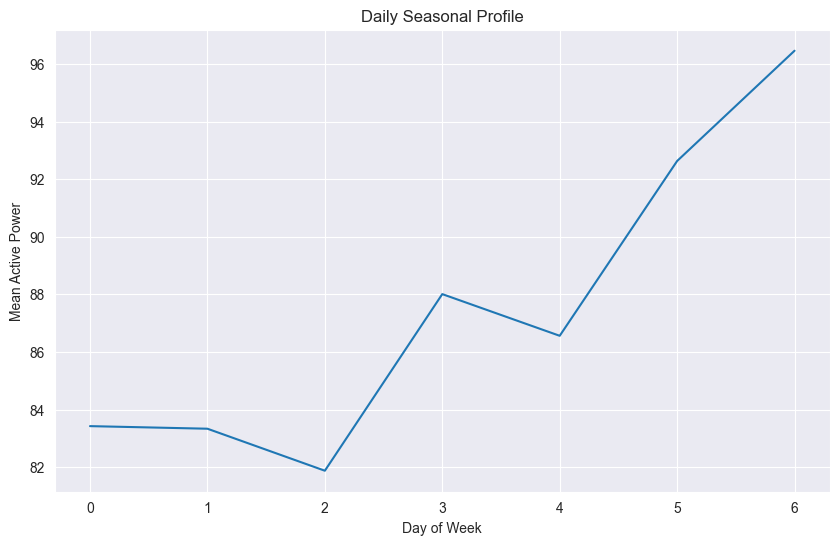

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/dataset_for_modeling.csv', parse_dates=['DateTime'])

# Heatmap of missing values
plt.figure(figsize=(10,6))
plt.imshow(df.isna().T, aspect='auto', cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Index')
plt.ylabel('Features')
plt.show()

# Anomaly detection scatter plot
if 'is_anomaly' in df.columns:
    plt.figure(figsize=(12,6))
    normal = df[df['is_anomaly'] == 0]
    anom = df[df['is_anomaly'] == 1]

    plt.scatter(normal['DateTime'], normal['Global_active_power'], s=1, label='Normal')
    plt.scatter(anom['DateTime'], anom['Global_active_power'], s=8, label='Anomalies', color='red')

    plt.title('Anomalies in Global Active Power')
    plt.xlabel('Date')
    plt.ylabel('Active Power')
    plt.legend()
    plt.show()

# Seasonal profile plots
df = df.set_index('DateTime')
hourly = df['Global_active_power'].groupby(df.index.hour).mean()
daily = df['Global_active_power'].groupby(df.index.dayofweek).mean()

plt.figure(figsize=(10,6))
plt.plot(hourly.index, hourly.values)
plt.title('Hourly Seasonal Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Active Power')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(daily.index, daily.values)
plt.title('Daily Seasonal Profile')
plt.xlabel('Day of Week')
plt.ylabel('Mean Active Power')
plt.show()